# Classes and Inheritance

## simulations

stochastic process
(discrete time) stochastic process
$x_1$ $x_2$ ...

examples of stochastic processes could be stock price over time, solar radiation per day, etc.

In [8]:
class Process:
    '''Representation of Stochastic Process'''
    def __init__(self,start_value=0):
        self.value=start_value
    def time_step(self):
        #raise NotImplementedError()
        pass

In [9]:
p1=Process()
p1.time_step()

In [23]:
class BoundedLinearProcess(Process):
    """A stochastic process that develops linearly.  
    Increases by velocity in every time period, but is bounded between
    0 and 1"""
    
    def __init__(self,start_value=0,velocity=0):
        #super function returns the initializer function of parent class.
        super().__init__(start_value)
        self.velocity=velocity
    def time_step(self):
        self.value+=self.velocity
        if self.value <0:
            self.value=-self.value
            self.velocity=-self.velocity
        if self.value > 1:
            self.value=1-(self.value-1)
            self.velocity=-self.velocity
        super().time_step
        #this super command isn't necessary now, but it might come in handy later.

In [12]:
p1=BoundedLinearProcess(0,0.3)
print(p1)

In [13]:
for i in range(4):
    p1.time_step()
    print("Current Process value:",p1.value)

Current Process value: 0.3
Current Process value: 0.6
Current Process value: 0.8999999999999999
Current Process value: 0.8


In [23]:
class Process:
    '''Representation of Stochastic Process'''
    def __init__(self,start_value=0):
        self.value=start_value
    def time_step(self):
        #raise NotImplementedError()
        pass
    
    #this in python is called a magic method.
    def __str__(self):
        return "Process with current value: " + str(self.value)
    def __repr__(self):
        return __str__(self)
    def simulate(self,steps=20):
        for i in range(steps):
            print(self)
            self.time_step()

In [24]:
p1=BoundedLinearProcess(0,0.3)
print(p1)

Process with current value: 0


In [25]:
for i in range(4):
    p1.time_step()
    print("Current Process value:",p1.value)

Current Process value: 0.3
Current Process value: 0.6
Current Process value: 0.8999999999999999
Current Process value: 0.8


In [24]:
class BoundedLinearProcess(Process):
    """A stochastic process that develops linearly.  
    Increases by velocity in every time period, but is bounded between
    0 and 1"""
    
    def __init__(self,start_value=0,velocity=0):
        #super function returns the initializer function of parent class.
        super().__init__(start_value)
        self.velocity=velocity
    def time_step(self):
        self.value+=self.velocity
        if self.value <0:
            self.value=-self.value
            self.velocity=-self.velocity
        if self.value > 1:
            self.value=1-(self.value-1)
            self.velocity=-self.velocity
        super().time_step
        #this super command isn't necessary now, but it might come in handy later
        
    def __str__(self):
        return " " * int(self.value*20) + "*"

In [14]:
p1=BoundedLinearProcess(0,0.3)
print(p1)
for i in range(20):
    p1.time_step()
    print(p1)

*
      *
            *
                  *
                *
          *
    *
 *
       *
              *
                    *
              *
       *
 *
    *
          *
                *
                  *
           *
     *
*


Autoregressive Process of order 1.
AR(1)
$$x_t = \alpha x_(t-1) + w_t$$

In [25]:
import numpy as np
#using this to get a draw from a normal distribution

class ARProcess(Process):
    def __init__(self,alpha=0.5,sigma=1,start_value=0):
        super().__init__(start_value)
        self.alpha=alpha
        self.sigma=sigma
    def time_step(self):
        self.value=self.alpha * self.value + np.random.normal(scale=self.sigma)
        super().time_step()
        
    def __str__(self):
        if self.value<0:
            s=" " * int(5*(self.value+3)) + "*" + " " + int(-self.value*5) + "|"
        elif self.value==0:
            s=" " * 15 + "*"
        else:
            s=" " * 15 + "|" + int(5 *self.value) + "*"

In [20]:
p2=ARProcess()
for i in range(20):
    print(p2)
    p2.time_step()

TypeError: __str__ returned non-string (type NoneType)

In [26]:
p1=BoundedLinearProcess(0,.1)
p2=ARProcess(alpha=0.9)

In [27]:
p1.simulate()

*
  *
    *
      *
        *
          *
            *
              *
               *
                  *
                   *
                  *
                *
              *
            *
          *
        *
      *
    *
  *


In [28]:
p2.simulate()

TypeError: __str__ returned non-string (type NoneType)

the time_step() method is an example of polymorphism, i.e. child classes can use a parent class's method in slightly different ways.

Random Walk

$x_t=x_(t-1) + w_t$

In [29]:
class RandomWalk(ARProcess):
    def __init__(self,sigma=1):
        super().__init__(alpha=1,sigma=sigma)

In [30]:
p3=RandomWalk()
p3.simulate()

TypeError: __str__ returned non-string (type NoneType)

# Using Polymorphism

In [37]:
class Process:
    '''Representation of Stochastic Process'''
    def __init__(self,start_value=0):
        self.value=start_value
        self.history=[]
    def time_step(self):
        #raise NotImplementedError()
        self.history.append(self.value)
    
    #this in python is called a magic method.
    def __str__(self):
        return "Process with current value: " + str(self.value)
    '''
    def __repr__(self):
        return __str__(self)
    '''
    def simulate(self,steps=20):
        for i in range(steps):
            print(self)
            self.time_step()

class BoundedLinearProcess(Process):
    """A stochastic process that develops linearly.  
    Increases by velocity in every time period, but is bounded between
    0 and 1"""
    
    def __init__(self,start_value=0,velocity=0):
        #super function returns the initializer function of parent class.
        super().__init__(start_value)
        self.velocity=velocity
    def time_step(self):
        self.value+=self.velocity
        if self.value <0:
            self.value=-self.value
            self.velocity=-self.velocity
        if self.value > 1:
            self.value=1-(self.value-1)
            self.velocity=-self.velocity
        super().time_step
       
        
    def __str__(self):
        return " " * int(self.value*20) + "*"

In [31]:
class ProcessPlotter:
    """An object to display the history of a process"""
    def __init__(self,process=None):
        self.process=process
    
    def plot(self):
        pass

In [33]:
class TextProcessPlotter(ProcessPlotter):
    def plot(self):
        upper=max(self.process.history)
        lower=min(self.process.history)
        if upper==lower:
            upper +=1
        for val in self.process.history:
            print(" " * int(20 * (val-lower)/(upper-lower)) + "*")

In [44]:
p1=BoundedLinearProcess(0,0.1)
plotter1=TextProcessPlotter(p1)
p1.simulate(10)
plotter1.plot()

*
  *
    *
      *
        *
          *
            *
              *
               *
                  *


ValueError: max() arg is an empty sequence

In [40]:
p2=RandomWalk()
plotter2=TextProcessPlotter(p2)
p2.simulate()
plotter2.plot()

TypeError: __str__ returned non-string (type NoneType)

In [45]:
import matplotlib
%matplotlib inline

class GraphicProcessPlotter(ProcessPlotter):
    def plot(self):
        matplotlib.pyplot.plot(self.process.history)
        matplotlib.pyplot.title("Process Time Plot")

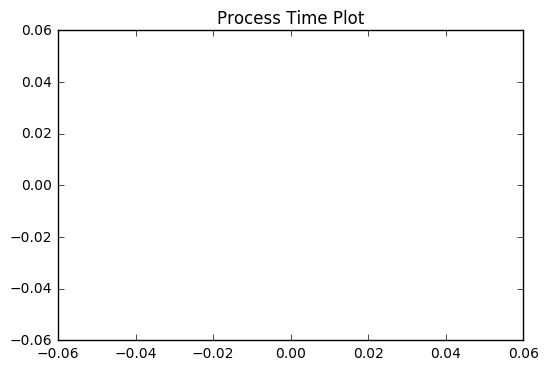

In [47]:
plotter3=GraphicProcessPlotter(p1)
plotter3.plot()

We have talked a lot about classes so far in this section. We have looked at how to write classes in an abstract manner to facilitate code reuse, and we have explored different ways of controlling access to data in classes with private variables. These are fundamental concepts of classes; however, there is a final component to introduce to you: inheritance.

In this context, inheritance is not related to a child inheriting items from a parent. Rather it involves our moving up a chain of abstraction for creating classes. Let's start with a real-world example.

In [14]:
class Animal:
    def __init__(self, name):
        self.name = name
    def move(self,x,y):
        print("%s moved to %i, %i" % (self.name, x, y))

In [15]:
a = Animal("Jeff the Giraffe")

Here we have created an animal class. It is pretty abstract, which is nice, but we would have to add a lot to it if we were going to try and actually use it. For example, we might need legs or arms, or whether or not it is warm-blooded or cold-blooded. This is where inheritance comes in.

In [3]:
class Kangaroo(Animal):
    def __init__(self, name):
        super().__init__(name)
        self.legs = 2
    
    def hop(self,x,y):
        print("%s is hopping..." % (self.name))
        self.move(x,y)

In [4]:
fred = Kangaroo("Fred")
fred.hop(1,2)

Fred is hopping...
Fred moved to 1, 2


Here we have created a kangaroo class that *inherits* from animal. Rather than specifying an animal type as an argument like we were doing in the previous notebook, we just created an entirely new class and added what we wanted to to it. This actually makes it a bit easier because now we can add special methods like `hop` that might only apply to kangaroos.

The advantage is that this can allow us to avoid rewriting a lot of code as our program develops. Now let's create another animal class.

In [5]:
class Snake(Animal):
    def __init__(self, name):
        super().__init__(name)
    def move(self, x, y):
        print("%s slithered to %i, %i" % (self.name, x, y))

In [6]:
bob = Snake("Bob")
bob.move(3,4)

Bob slithered to 3, 4


Did you notice how we did that a bit differently? Rather than writing a whole new method called "slither," we just **overrode** the `move` method to suit our purposes. Now we can just call "move" and it will do the movement for us. This gives us a distinct advantage that we will see in a moment once we rewrite our classes. Notice how movement is more general; there is an "action" being performed and we can store that.

In [7]:
class Animal:
    def __init__(self, name, movement):
        self.name = name
        self.verb = movement
    def move(self,x,y):
        print("%s %s to %i, %i" % (self.name, self.verb, x, y))

In [8]:
class Kangaroo(Animal):
    def __init__(self, name):
        verb = "hopped"
        super().__init__(name, verb)
        self.legs = 2
    
    def hop(self,x,y):
        self.move(x,y)

In [9]:
class Snake(Animal):
    def __init__(self, name):
        verb = "slithered"
        super().__init__(name, verb)
    
    def slither(self,x,y):
        self.move(x,y)

In [10]:
bob2 = Snake("Bob")
bob2.slither(1,2)

Bob slithered to 1, 2


In [11]:
jeff = Kangaroo("Jeff")
jeff.hop(1,2)

Jeff hopped to 1, 2


We are really doing two things here: We are making things more general by allowing specifying the move method as the only one that allows for movement. We are also allowing the individual characteristics of these animals to take advantage of this.

Now we can do more powerful things. For example, I have a list of animals, and I am not sure what the animals are before running my code; they were passed back to me by another part of the code that I am not in charge of. I just know that all those animals need to congregate at a certain location.

In [12]:
import random

my_animals = []
for x in range(10):
    random_integer = random.randint(1,2)
    if random_integer == 1:
        my_animals.append(Snake("Snake Number: " + str(x)))
    else:
        my_animals.append(Kangaroo("Kangaroo Number: " + str(x)))

In [13]:
for animal in my_animals:
    animal.move(5,10)

Snake Number: 0 slithered to 5, 10
Kangaroo Number: 1 hopped to 5, 10
Snake Number: 2 slithered to 5, 10
Snake Number: 3 slithered to 5, 10
Snake Number: 4 slithered to 5, 10
Snake Number: 5 slithered to 5, 10
Snake Number: 6 slithered to 5, 10
Snake Number: 7 slithered to 5, 10
Kangaroo Number: 8 hopped to 5, 10
Kangaroo Number: 9 hopped to 5, 10


Impressive, isn't it? We simply took a list and acted upon it without knowing what was inside of it. We were able to do this through something called *duck-typing*. Duck-typing means that Python will apply the same operation on different objects as long as that object has the method we are looking for.

In this case, it is whether or not it has the move case. Even better, these do not even have to inherit from the same class; a rock would be able to be in that list (even though it is not an animal) if it had the move class.

We can actually extend this even further. Classes do not have to inherit from just one class; they can inherit from multiple classes.

Now I will need to do a fair amount of typing to get this set up, but by the end it will be a good example.

In [14]:
class Drone:
    def __init__(self, power_system, drone_type):
        print("Instantiating a drone")
        self.power_system = power_system
        self.__dtype = drone_type
        self.__move_count = 0
        
    @property
    def move_count(self):
        return self.__move_count
    
    @property
    def dtype(self):
        print("The dtype property getter")
        return self.__dtype
        
    @dtype.setter
    def dtype(self, new_type):
        print("Sorry, you can never change the drone type once created")
        
    def move(self):
        self.__move_count += 1

Notice how we did not have to create a setter for our move_count property because this value can only be changed by moving; all we can do is check its value.

In [15]:
class AerialDrone(Drone):
    def __init__(self, power_system):
        super().__init__(power_system, "plane")
        
    def move(self):
        super().move()
        return "The %s-powered drone is currently flying" % (self.power_system)

We have done something new: we have called the super class' method of move and have added our own touch on it. This makes for great reusable code, especially when the first method is abstract enough for our purposes.
*In line 1, "class" has a single quote or apostrophe after it. What is intended here? Unsure if it is missing a starting single quote; however, if possessive is intended, it would need to be spelled "class's".*

In [16]:
d1 = AerialDrone("battery")

Instantiating a drone


In [17]:
print(d1.move())
print(d1.move())
print(d1.move_count)

The battery-powered drone is currently flying
The battery-powered drone is currently flying
2


Just for illustrative purposes, I'm going to create a submarine drone class. It is similar to the plane class, but obviously it is underwater.

In [18]:
class SubmarineDrone(Drone):
    def __init__(self, power_system):
        super().__init__(power_system, "submarine")
        
    def move(self):
        super().move()
        return "The %s-powered drone is currently moving through the water" % (self.power_system)

Next, I will create a person class. In this case, a person can get injured and be healed.

In [19]:
class Person:
    def __init__(self, name):
        self.__injured = False
        self.name = name
        
    def get_injured(self):
        print("%s is now injured." % self.name)
        self.__injured = True
        
    def heal(self):
        print("%s is now healed." % self.name)
        self.__injured = False

Here is where things get a bit more interesting. I will make a pretty abstract class called Medical. This class is just going to hold some other variables for us and give us a patch method.
*Two questions: Should "Medical" be "Medic"? Also, here "Medical" is capped. Should all of the class names be capped?*

In [20]:
class Medic:
    __bandages = 12
    
    def patch(self, person, patch_type):
        if patch_type != "bandages":
            return "Don't have those bandages."
        else:
            person.heal()
            self.__bandages -= 1
            print("%i bandages left." % self.__bandages)
            return "Used a patch!"

It has to get a person (or something with the heal method) in order to work. Note how we did not have to use the "self" keyword because we are in the top level of the class; you only need to use self inside of method definitions.

Now that we have created that, we can take things to the next level and make a `MedicalAerialDrone`.

In [21]:
class MedicalAerialDrone(AerialDrone, Medic):
    pass

The pass keyword simply means that we will not add anything else to this class. We can do it with functions too. But regardless, all you have to know is that it inherits all of its methods and attributes from AerialDrone and Medic.

In [22]:
md = Person("Matt Damon")
medical_drone = MedicalAerialDrone("battery")

Instantiating a drone


We have just created Matt Damon and a medical aerial drone. Let's injure Matt Damon so that we can patch him up with our aerial drone.

In [23]:
md.get_injured()

Matt Damon is now injured.


Now we can patch him up with our medical drone.

In [24]:
medical_drone.patch(md, "bandages")

Matt Damon is now healed.
11 bandages left.


'Used a patch!'

Noticed that we did not need to rewrite any code at all; we just inherited from two classes that had everything we needed. In addition, our Medic class is abstract enough that a person can be a medic too.

In [25]:
class PersonMedic(Person, Medic):
    pass

bill = PersonMedic("Bill Clinton")
md.get_injured()
bill.patch(md, "bandages")

Matt Damon is now injured.
Matt Damon is now healed.
11 bandages left.


'Used a patch!'

By now you should be starting to see the power of inheritance and code reusability. Particularly when you have the object mindset, things really start becoming powerful. There are a lot of ways to try to facilitate code reuse, not just objected-oriented programming, although this is a popular one that you will continually encounter.